In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon
from descartes import PolygonPatch
import matplotlib.ticker as plticker
import numpy as np

# [Our World in Data](https://ourworldindata.org/coronavirus-source-data)

> Accumulated Data on Corona Virus Cases

In [72]:
df=pd.read_csv('data/owid-covid-data.csv');df=df[df['location']!='World'];df=df[df['iso_code'].notnull()];df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25678,ZWE,Africa,Zimbabwe,2020-06-20,479.0,16.0,4.0,0.0,32.228,1.077,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
25679,ZWE,Africa,Zimbabwe,2020-06-21,486.0,7.0,6.0,2.0,32.699,0.471,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
25680,ZWE,Africa,Zimbabwe,2020-06-22,489.0,3.0,6.0,0.0,32.901,0.202,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
25681,ZWE,Africa,Zimbabwe,2020-06-23,512.0,23.0,6.0,0.0,34.448,1.547,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49


### Proportional Comparisons

In [73]:
top_10_countries=dict(sorted({o[0]:o[1]['total_cases'].max() for o in df.groupby('location')}.items(), key=lambda x: x[1], reverse=True)[:10])

<Figure size 576x576 with 0 Axes>

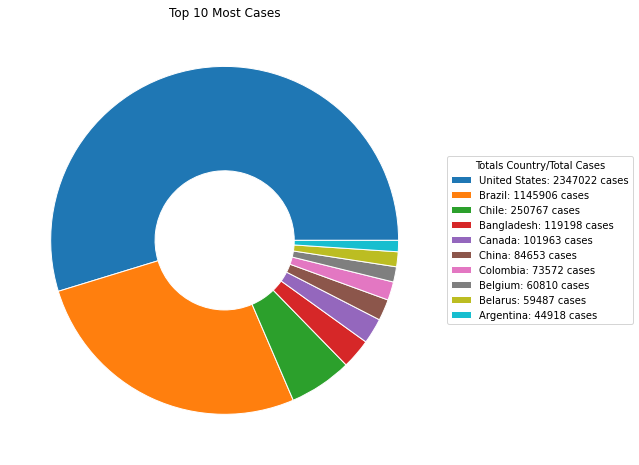

In [74]:
plt.figure(figsize = (8, 8), facecolor = None) 
fig, ax = plt.subplots()

size = 0.6

cmap = plt.get_cmap("tab10")
colors=cmap(np.arange(10))

wedges, texts=ax.pie(top_10_countries.values(),radius=1,colors=colors,wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect="equal", title='Top 10 Most Cases')
ax.legend(wedges,map(lambda x: f'{x[0]}: {int(x[1])} cases',top_10_countries.items()),
          title="Totals Country/Total Cases",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.gcf().set_size_inches(*(8,8))
fig.savefig('total_cases_pie.png', bbox_inches='tight')
plt.show()

<Figure size 576x576 with 0 Axes>

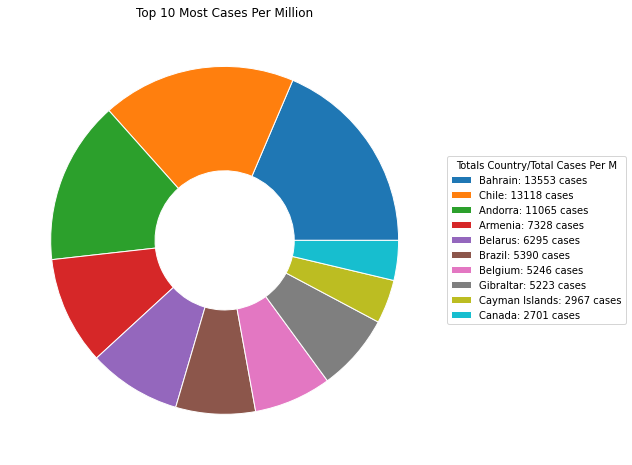

In [75]:
top_10_countries_per_million=dict(sorted({o[0]:o[1]['total_cases_per_million'].max() for o in df.groupby('location')}.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure(figsize = (8, 8), facecolor = None) 
fig, ax = plt.subplots()

size = 0.6

cmap = plt.get_cmap("tab10")
colors=cmap(np.arange(10))

wedges, texts=ax.pie(top_10_countries_per_million.values(),radius=1,colors=colors,wedgeprops=dict(width=size, edgecolor='w'))
ax.set(aspect="equal", title='Top 10 Most Cases Per Million')
ax.legend(wedges,map(lambda x: f'{x[0]}: {int(x[1])} cases',top_10_countries_per_million.items()),
          title="Totals Country/Total Cases Per M",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.gcf().set_size_inches(*(8,8))
fig.savefig('total_cases_per_million_pie.png', bbox_inches='tight')
plt.show()

### Linear Comparisons

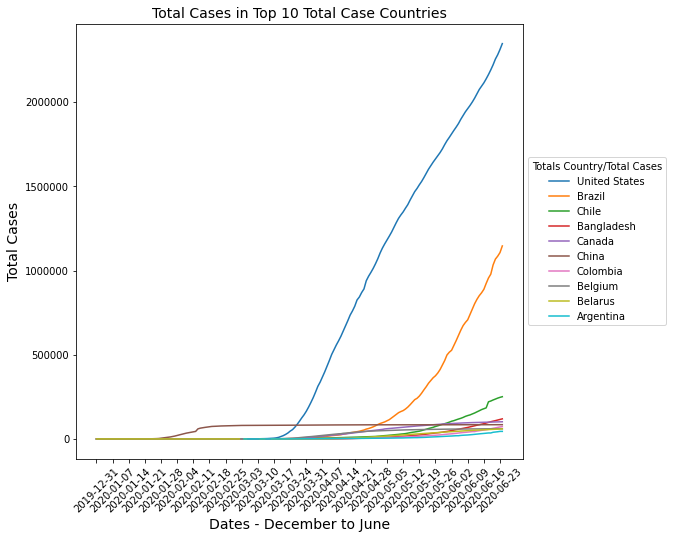

In [76]:
lindf=df[df['location'].isin(top_10_countries.keys())].sort_values(by='date');lindf

cmap = plt.get_cmap("tab10")
colors=cmap(np.arange(12))
fig, ax = plt.subplots()

idx=np.arange(0,len(list(lindf['date'].unique())),7)
full_idx=np.arange(0,len(list(lindf['date'].unique())),1)
full_idx_date_map={d:i for i,d in zip(full_idx,lindf['date'].unique())}
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xticks(idx)
ax.set_xticklabels(np.array(lindf['date'].unique())[idx], rotation=45)
ax.set_title('Total Cases in Top 10 Total Case Countries',fontdict={'size':'14'})
ax.set_ylabel('Total Cases',fontdict={'size':'14'})
ax.set_xlabel('Dates - December to June',fontdict={'size':'14'})

for i,loc in enumerate(top_10_countries.keys()):
    sub_df=lindf[lindf['location']==loc]
    ax.plot([full_idx_date_map[d] for d in sub_df['date']],list(sub_df['total_cases']),color=colors[i])
    
ax.legend(top_10_countries.keys(),
          title="Totals Country/Total Cases",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))



plt.gcf().set_size_inches(*(8,8))
fig.savefig('total_cases_lin.png', bbox_inches='tight')
plt.show()

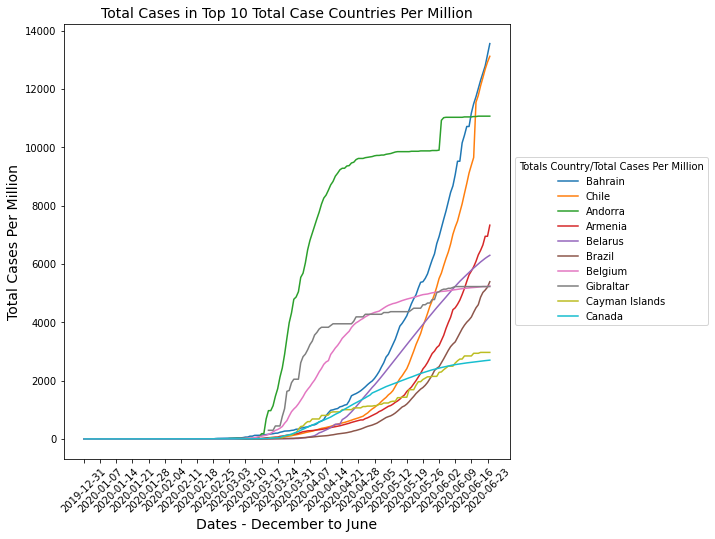

In [77]:
lindf=df[df['location'].isin(top_10_countries_per_million.keys())].sort_values(by='date');lindf

cmap = plt.get_cmap("tab10")
colors=cmap(np.arange(12))
fig, ax = plt.subplots()

idx=np.arange(0,len(list(lindf['date'].unique())),7)
full_idx=np.arange(0,len(list(lindf['date'].unique())),1)
full_idx_date_map={d:i for i,d in zip(full_idx,lindf['date'].unique())}
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xticks(idx)
ax.set_xticklabels(np.array(lindf['date'].unique())[idx], rotation=45)
ax.set_title('Total Cases in Top 10 Total Case Countries Per Million',fontdict={'size':'14'})
ax.set_ylabel('Total Cases Per Million',fontdict={'size':'14'})
ax.set_xlabel('Dates - December to June',fontdict={'size':'14'})

for i,loc in enumerate(top_10_countries_per_million.keys()):
    sub_df=lindf[lindf['location']==loc]
    ax.plot([full_idx_date_map[d] for d in sub_df['date']],list(sub_df['total_cases_per_million']),color=colors[i])
    
ax.legend(top_10_countries_per_million.keys(),
          title="Totals Country/Total Cases Per Million",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))



plt.gcf().set_size_inches(*(8,8))
fig.savefig('total_cases_per_m_lin.png', bbox_inches='tight')
plt.show()

Some interesting obbserviations:
- United States may have the highest total number of cases, however per million, it doesn't even make top 10. 
- We want to see why that measures the top 10 countries with cases per million have compared to countries with top 10 total cases.

# [ACAPS Government Measures](https://www.acaps.org/)

> What measure have been take, and how successfully.

In [78]:
df=pd.read_excel('data/acaps_covid19_government_measures_dataset.xlsx',sheet_name='Database',nrows=None);df['CATEGORY'].unique()

array(['Public health measures', 'Governance and socio-economic measures',
       'Social distancing', 'Movement restrictions', 'Lockdown',
       'Humanitarian exemption'], dtype=object)

In [79]:
top_10_cases_measure_countries=dict({o[0]:o[1] for o in df.groupby('COUNTRY') if any(o[0].__contains__(k) for k in top_10_countries.keys())})

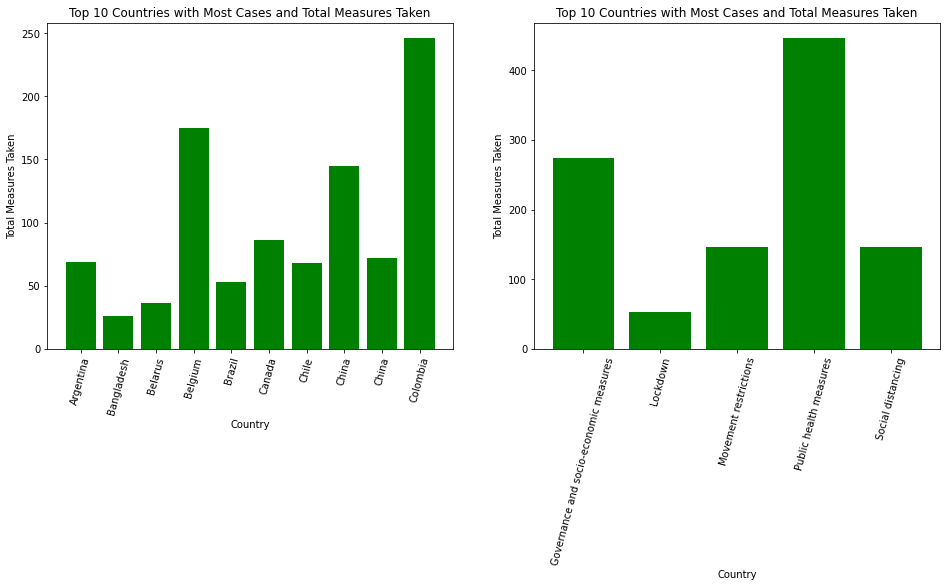

In [80]:
x=[k if not k.__contains__('China') else 'China' for k in top_10_cases_measure_countries]
y=[len(top_10_cases_measure_countries[k]) for k in top_10_cases_measure_countries]
fig, ax = plt.subplots(1,2)

ax[0].bar(x,y, color='green')
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Total Measures Taken")
ax[0].set_title("Top 10 Countries with Most Cases and Total Measures Taken")
ax[0].set_xticklabels(x,rotation=75)

categories={oo[0]:oo[1] for oo in df[df['COUNTRY'].isin([o[0] for o in df.groupby('COUNTRY') 
                                              if any(o[0].__contains__(k) for k in top_10_countries.keys())])].groupby('CATEGORY')}
x=list(categories.keys())
y=[len(o) for o in categories.values()]
ax[1].bar(x,y, color='green')
ax[1].set_xlabel("Country")
ax[1].set_ylabel("Total Measures Taken")
ax[1].set_title("Top 10 Countries with Most Cases and Total Measures Taken")
ax[1].set_xticklabels(x,rotation=75)

plt.gcf().set_size_inches(*(16,6))
fig.savefig('total_cases_bar.png', bbox_inches='tight')
plt.show()

In [81]:
top_10_cases_per_m_measure_countries=dict({o[0]:o[1] for o in df.groupby('COUNTRY') if o[0] in list(top_10_countries_per_million.keys())})

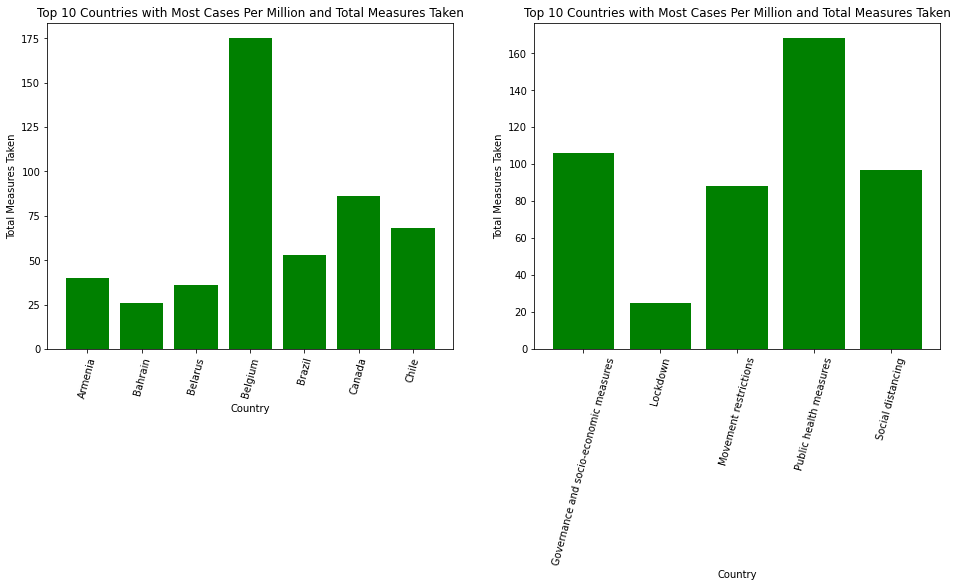

In [82]:
x=list(top_10_cases_per_m_measure_countries.keys())
y=[len(top_10_cases_per_m_measure_countries[k]) for k in top_10_cases_per_m_measure_countries]

fig, ax = plt.subplots(nrows=1,ncols=2)

ax[0].bar(x,y, color='green')
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Total Measures Taken")
ax[0].set_title("Top 10 Countries with Most Cases Per Million and Total Measures Taken")
ax[0].set_xticklabels(x,rotation=75)


categories={oo[0]:oo[1] for oo in df[df['COUNTRY'].isin([o[0] for o in df.groupby('COUNTRY') 
                                              if any(o[0].__contains__(k) for k in top_10_cases_per_m_measure_countries.keys())])].groupby('CATEGORY')}
x=list(categories.keys())
y=[len(o) for o in categories.values()]
ax[1].bar(x,y, color='green')
ax[1].set_xlabel("Country")
ax[1].set_ylabel("Total Measures Taken")
ax[1].set_title("Top 10 Countries with Most Cases Per Million and Total Measures Taken")
ax[1].set_xticklabels(x,rotation=75)

plt.gcf().set_size_inches(*(16,6))
fig.savefig('total_cases_per_million_bar.png', bbox_inches='tight')
plt.show()